# Week 1 ‒ 원티드 국민연금 DB를 이용해서 유니콘 기업 발굴하기

# 1. 데이터셋 불러오기
- 회사 수: 약 5,000개
- 월별 데이터: 직원 수, 국민연금 보험료 (인원 수에 대한 상한선_최대고지금액 이 존재함)
- 년 단위 데이터: 매출액 (천원 단위)

In [1]:
# 필요 라이브러리 호출 및 세팅
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

plt.rc("font",family = "Malgun Gothic")
plt.rc("axes",unicode_minus = False)
pd.options.display.float_format = '{:20,.0f}'.format

In [2]:
# 데이터셋 불러오기
df = pd.read_csv('company_nps_data.csv', encoding='cp949')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [3]:
# 데이터 사이즈 및 컬럼별 타입확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [4]:
# 기본통계 확인
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,"99,801","99,801","99,801","99,801","99,801","99,801"
mean,"276,298","30,535,893","2,017",7,"9,734,079",38
std,"133,903","301,664,669",1,4,"43,472,560",147
min,63,"-7,882,176","2,015",1,0,0
25%,"165,530","1,409,760","2,016",4,"1,181,160",6
50%,"259,149","3,573,585","2,017",7,"2,332,760",11
75%,"382,656","9,582,321","2,018",10,"5,591,860",24
max,"5,159,723","11,328,779,396","2,019",12,"978,067,260","3,133"


In [5]:
# 결측치 확인
df.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

# 2. 전처리

## 월별 직원수

In [6]:
# 월별 직원수가 0인 데이터 확인
df[df['월별_직원수'] == 0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
4450,478999,394790,2016,3,0,0
6162,568445,740245,2018,10,0,0
7251,288014,3709457,2016,11,0,0
12176,568445,740245,2018,8,0,0
20070,550603,416881,2018,1,0,0
33869,439536,237277,2016,10,0,0
39671,602137,892176,2018,6,0,0
49592,291968,4059302,2016,4,0,0
54026,277054,95478,2016,5,0,0
64139,472629,1915700,2018,1,0,0


In [7]:
# 아래 회사(ID : 472629)의 경우 2018년 1월의 연금보험료 및 직원수 데이터와 2017년 데이터 전체가 누락되어 있음
# 정보누락 및 오류가 있는 데이터셋으로 보임 
df[df['회사ID'] == 472629].sort_values(by = ['년도', '월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
52659,472629,1116472,2016,1,368100,4
85454,472629,1116472,2016,2,368100,4
5260,472629,1116472,2016,3,368100,4
46958,472629,1116472,2016,4,368100,4
91370,472629,1116472,2016,5,368100,4
57480,472629,1116472,2016,6,368100,4
72105,472629,1116472,2016,7,230740,3
80069,472629,1116472,2016,8,230740,3
86888,472629,1116472,2016,9,230740,3
8455,472629,1116472,2016,10,230740,3


In [8]:
# 연금보험료, 직원수가 0인 경우 데이터를 왜곡할 수 있으므로 제외
df = df[df['월별_직원수'] != 0]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


## 연매출액

In [9]:
# 연매출액이 마이너스인 데이터 확인
df[df['연매출액'] < 0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
7516,432911,-7882176,2017,5,2042620,6
7617,432911,-7882176,2017,10,1687760,5
8595,432911,-7882176,2017,1,2042620,6
23150,432911,-7882176,2017,7,2091860,6
36048,432911,-7882176,2017,2,2042620,6
37489,432911,-7882176,2017,11,1687760,5
51605,432911,-7882176,2017,6,2042620,6
56276,432911,-7882176,2017,4,2042620,6
64094,432911,-7882176,2017,3,2042620,6
67889,432911,-7882176,2017,12,1687760,5


In [10]:
# 해당 데이터 제외
df = df[df['연매출액'] > 0]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


## 1년치 데이터만 있는 경우

In [11]:
# 유니콘 기업 선별 지표로 매출 성장률을 사용할 예정이므로, 1년치 데이터만 있는 회사는 제외하고 분석 진행
# 2409개 회사는 1년치 자료만 존재
df_multi_check = df.groupby(['회사ID', '년도'])[['연매출액', '월별_연금보험료', '월별_직원수']].agg('mean').reset_index()
df_multi_check = df_multi_check.groupby('회사ID')['년도'].count().reset_index()
df_multi_check[df_multi_check['년도'] == 1]

,회사ID,년도
0,63,1
1,95,1
2,102,1
3,295,1
4,414,1
...,...,...
4993,2400284,1
4994,2437574,1
4995,2693684,1
4996,3312354,1


In [12]:
df_multi = df_multi_check[df_multi_check['년도'] > 1]
df_multi_list = df_multi['회사ID'].tolist()

In [13]:
# 2개년치 이상 자료가 있는 회사만 추리기
df = df[df['회사ID'].isin(df_multi_list)]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99794,466886,119791,2018,2,336220,4
99795,150135,7119441,2016,12,4872520,25
99796,171439,4630622,2017,2,2402740,11
99799,362194,2100218,2018,12,874780,3


## 필요컬럼 생성

In [14]:
# 연월 컬럼 생성
df['연월'] = df['년도'].astype(str) + '-' + df['월'].astype(str)
df['연월'] = pd.to_datetime(df['연월'], infer_datetime_format= True)
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,233757,41688077,2018,7,8912380,36,2018-07-01
1,123464,1760695,2018,3,942380,5,2018-03-01
2,342124,3221341,2018,7,781180,4,2018-07-01
3,386420,4815584,2015,11,3795900,14,2015-11-01
4,129243,9799736,2018,10,40724680,151,2018-10-01
...,...,...,...,...,...,...,...
99794,466886,119791,2018,2,336220,4,2018-02-01
99795,150135,7119441,2016,12,4872520,25,2016-12-01
99796,171439,4630622,2017,2,2402740,11,2017-02-01
99799,362194,2100218,2018,12,874780,3,2018-12-01


In [15]:
# 연매출액(억원) 컬럼 생성
df['연매출액(억원)'] = df['연매출액'] / 10000
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,연매출액(억원)
0,233757,41688077,2018,7,8912380,36,2018-07-01,"4,169"
1,123464,1760695,2018,3,942380,5,2018-03-01,176
2,342124,3221341,2018,7,781180,4,2018-07-01,322
3,386420,4815584,2015,11,3795900,14,2015-11-01,482
4,129243,9799736,2018,10,40724680,151,2018-10-01,980
...,...,...,...,...,...,...,...,...
99794,466886,119791,2018,2,336220,4,2018-02-01,12
99795,150135,7119441,2016,12,4872520,25,2016-12-01,712
99796,171439,4630622,2017,2,2402740,11,2017-02-01,463
99799,362194,2100218,2018,12,874780,3,2018-12-01,210


# 3. 연매출액 성장률 기준 상위기업 확인

In [16]:
# 회사ID, 연도로 groupby하여 df_grouped에 저장
# 회사별로 연매출액, 연금보험료, 총급여, 직원수 평균값 계산 --> 연금보험료는 중위값으로 할지 고민 필요
df_grouped = df.groupby(['회사ID', '년도'])[['연매출액', '월별_연금보험료', '월별_직원수']].agg('mean')
df_grouped = df_grouped.rename(columns = {'월별_연금보험료' : '연평균_연금보험료', '월별_직원수' : '연평균_직원수'})
df_grouped

연매출액            연평균_연금보험료              연평균_직원수
회사ID   년도                                                                 
14271  2015            1,199,495            3,065,310                   13
       2016            4,257,715            3,683,752                   15
       2017            5,005,248            3,652,973                   17
       2018            8,388,401            4,231,797                   20
       2019            9,039,340            4,796,880                   22
...                          ...                  ...                  ...
516653 2016            1,745,520              443,260                    4
       2017            1,956,460              557,710                    5
       2018            1,500,046              549,920                    4
620445 2018            1,953,553              605,720                    4
       2019              767,324              662,720                    4

[7699 rows x 3 columns]

In [17]:
# 연매출액이 1000억원 이상인 데이터 df_grouped_rev에 저장
df_grouped_rev = df_grouped[df_grouped['연매출액']>100000000].reset_index().sort_values(by = ['회사ID', '년도'])
df_grouped_rev.head()

,회사ID,년도,연매출액,연평균_연금보험료,연평균_직원수
0,126516,2015,"1,061,715,908","589,243,890","1,669"
1,126516,2016,"468,913,812","587,424,690","1,620"
2,126516,2017,"402,601,664","516,652,753","1,377"
3,126521,2015,"567,910,907","514,648,740","1,554"
4,126521,2016,"560,278,128","533,548,702","1,591"


In [18]:
df_grouped_rev['매출액_성장률'] = df_grouped_rev.groupby('회사ID')['연매출액'].pct_change()*100
df_grouped_rev

,회사ID,년도,연매출액,연평균_연금보험료,연평균_직원수,매출액_성장률
0,126516,2015,"1,061,715,908","589,243,890","1,669",nan
1,126516,2016,"468,913,812","587,424,690","1,620",-56
2,126516,2017,"402,601,664","516,652,753","1,377",-14
3,126521,2015,"567,910,907","514,648,740","1,554",nan
4,126521,2016,"560,278,128","533,548,702","1,591",-1
...,...,...,...,...,...,...
264,469677,2018,"108,023,614","119,056,590",546,nan
265,510329,2015,"149,770,456","134,253,090",595,nan
266,510329,2016,"136,264,259","132,743,530",597,-9
267,510329,2017,"134,718,002","134,353,748",593,-1


## 매출액 연도별 성장률이 높았던 기업

In [46]:
# 매출액 성장률이 높았던 회사-연도 순으로 50개 데이터확인
top_revenue = df_grouped_rev.sort_values(by = '매출액_성장률', ascending = False).head(50)
top_revenue

,회사ID,년도,연매출액,연평균_연금보험료,연평균_직원수,매출액_성장률
51,127090,2017,"654,716,561","139,911,868",397,69
186,297874,2017,"1,501,348,760","8,940,235",40,68
31,126814,2017,"625,604,516","129,171,910",508,57
145,232757,2017,"256,498,559","7,585,987",41,54
154,294337,2018,"287,134,819","440,364,375","2,087",49
138,231384,2017,"165,528,767","22,188,728",68,43
133,231173,2016,"254,750,714","62,542,657",190,43
152,294337,2016,"146,274,359","293,931,090","1,450",43
158,294367,2019,"875,661,976","328,258,880","1,071",38
148,234236,2016,"149,611,055","6,593,653",22,36


In [49]:
# 중복 제거후 36개 기업
top_revenue_list = set(top_revenue['회사ID'].tolist())
len(top_revenue_list)

36

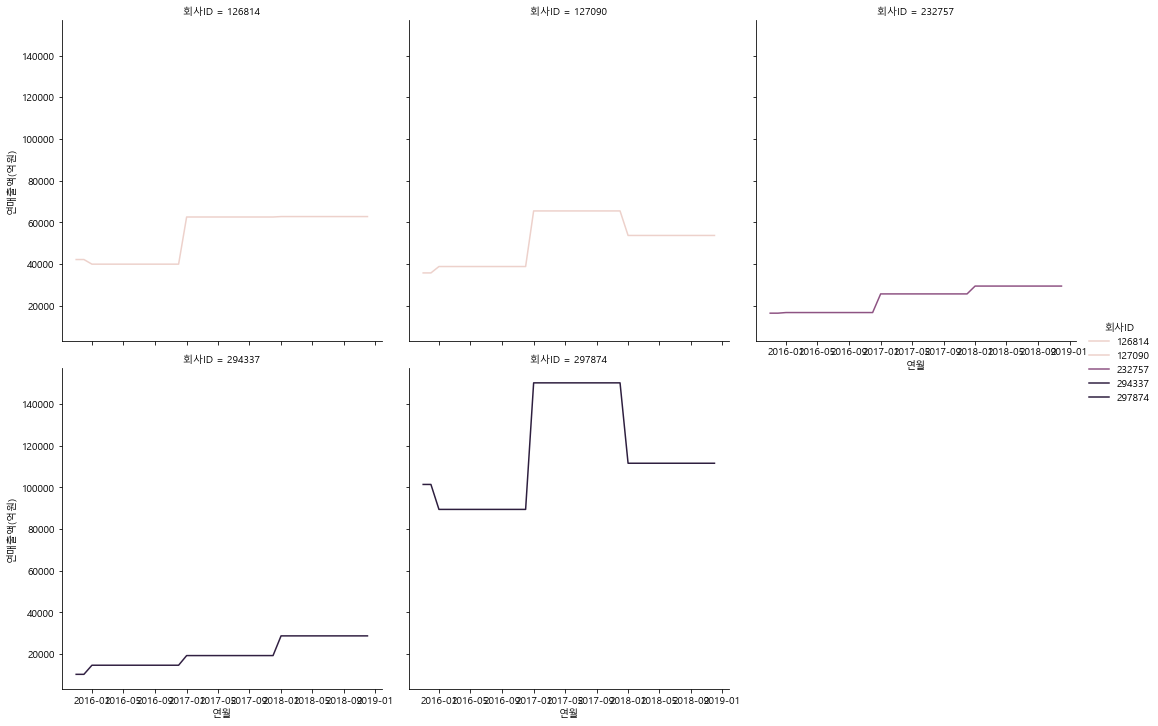

In [21]:
# 연도별 매출액 비교 (매출액 연도별 성장률 상위 5개 기업)
sns.relplot(data=df[df['회사ID'].isin(['127090','297874','126814','232757','294337'])], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

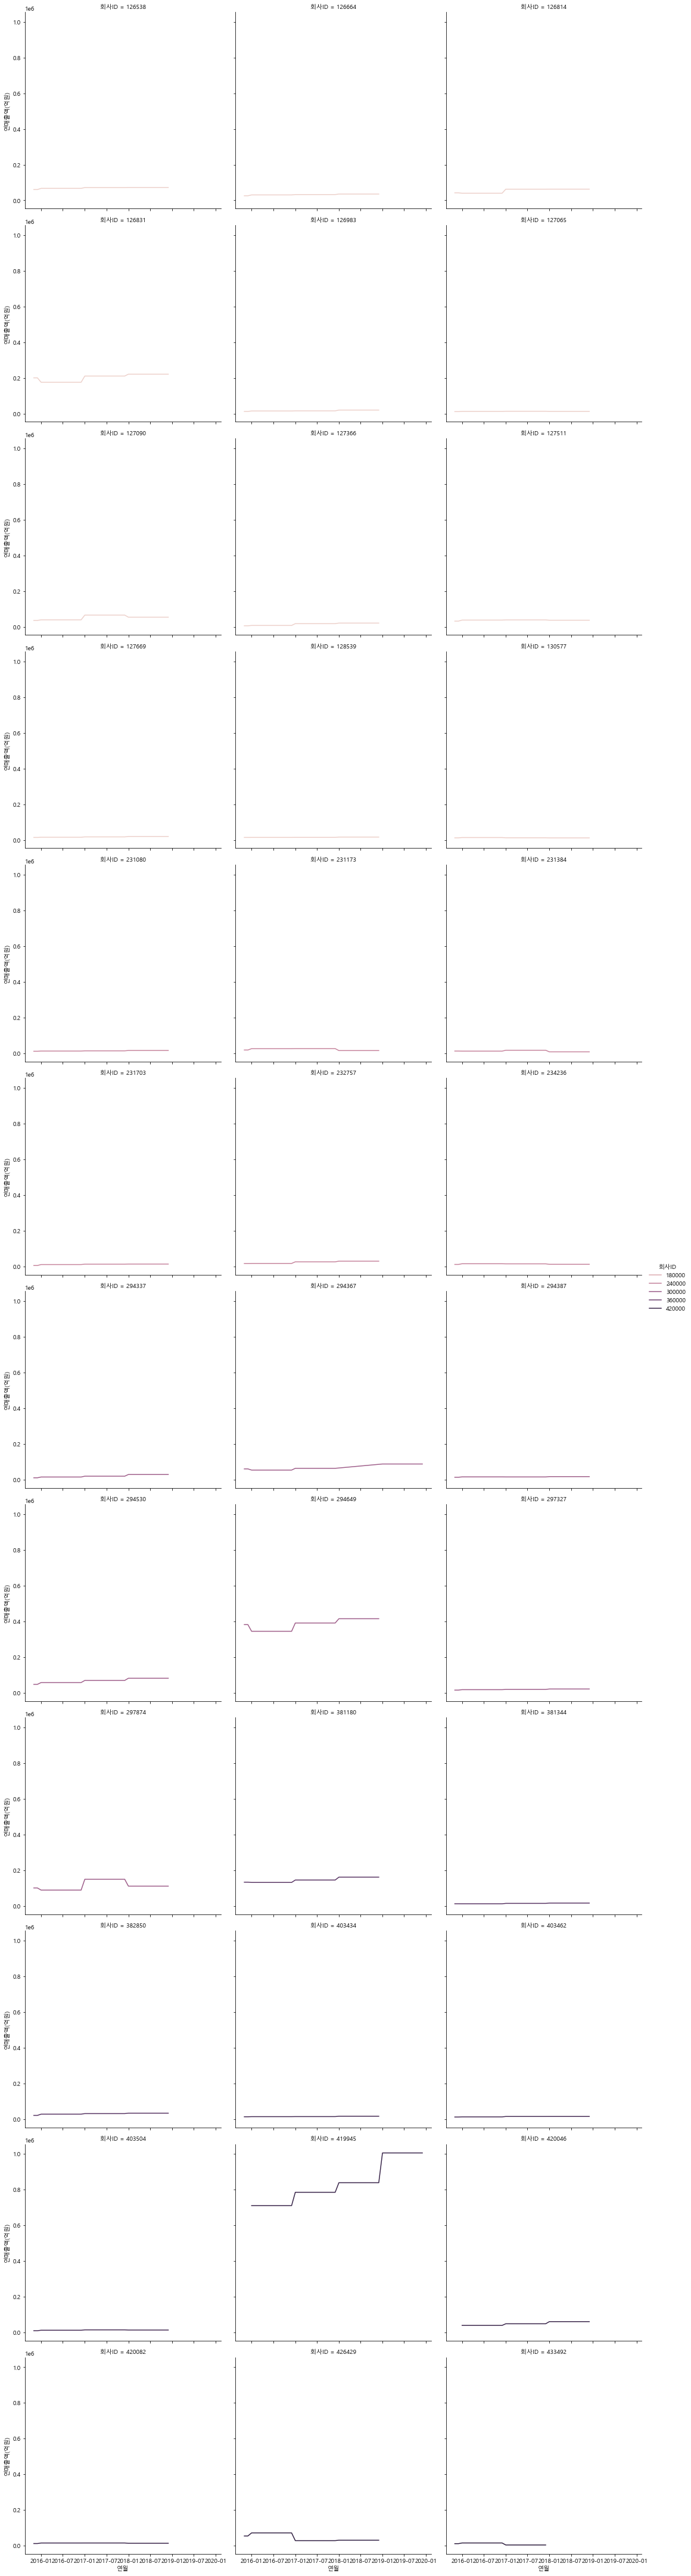

In [50]:
# 연도별 매출액 비교 (top_revenue_list 전체)
sns.relplot(data=df[df['회사ID'].isin(top_revenue_list)], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

## 매출액 평균 성장률이 높았던 기업

In [52]:
# 매출액 평균 성장률이 높았던 회사순으로 20개사 확인
top_avg_revenue = df_grouped_rev.groupby('회사ID')['매출액_성장률'].agg('mean').reset_index().sort_values(
    by = '매출액_성장률', ascending = False).head(20)
top_avg_revenue

,회사ID,매출액_성장률
43,294337,41
77,433492,34
70,420046,24
41,232757,23
13,127090,20
46,294530,20
38,231384,20
10,126983,18
16,127366,18
8,126814,17


In [53]:
top_avg_revenue_list = set(top_avg_revenue['회사ID'].tolist())
top_avg_revenue_list

{126664,
 126814,
 126983,
 127090,
 127366,
 127669,
 231080,
 231384,
 231703,
 232757,
 294337,
 294367,
 294530,
 297327,
 297874,
 381344,
 382850,
 419945,
 420046,
 433492}

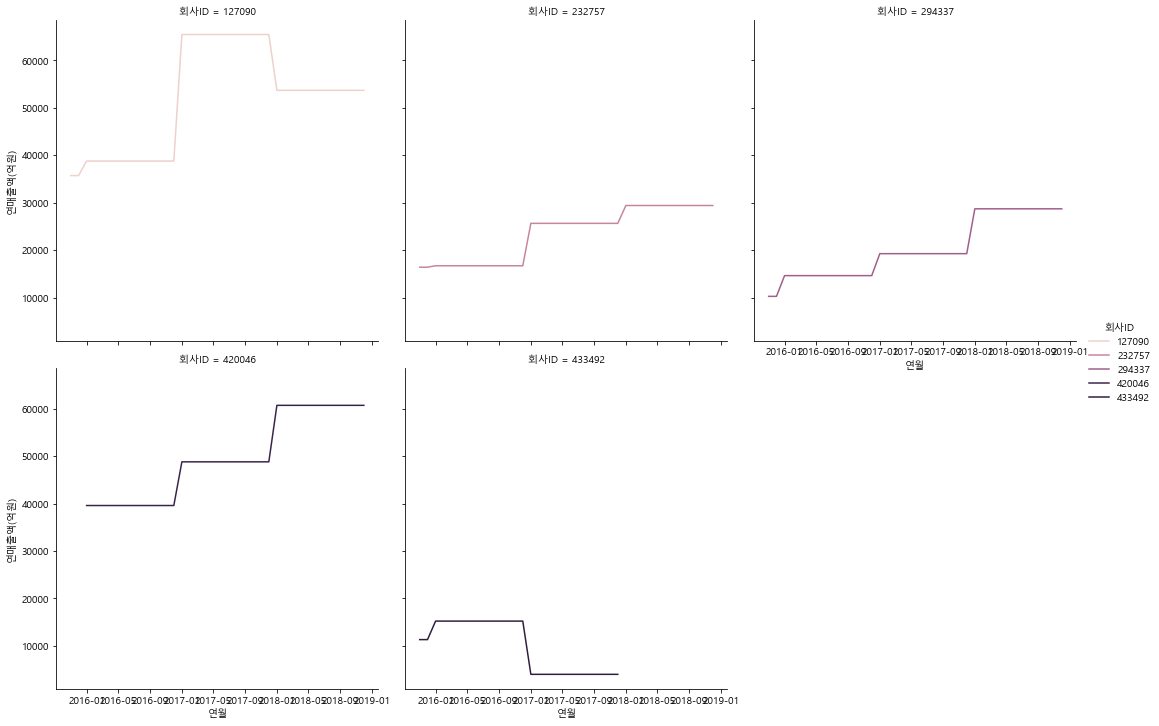

In [25]:
# 연도별 매출액 비교 (매출액 연도별 성장률 상위 5개 기업)
sns.relplot(data=df[df['회사ID'].isin(['294337','433492','420046','232757','127090'])], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

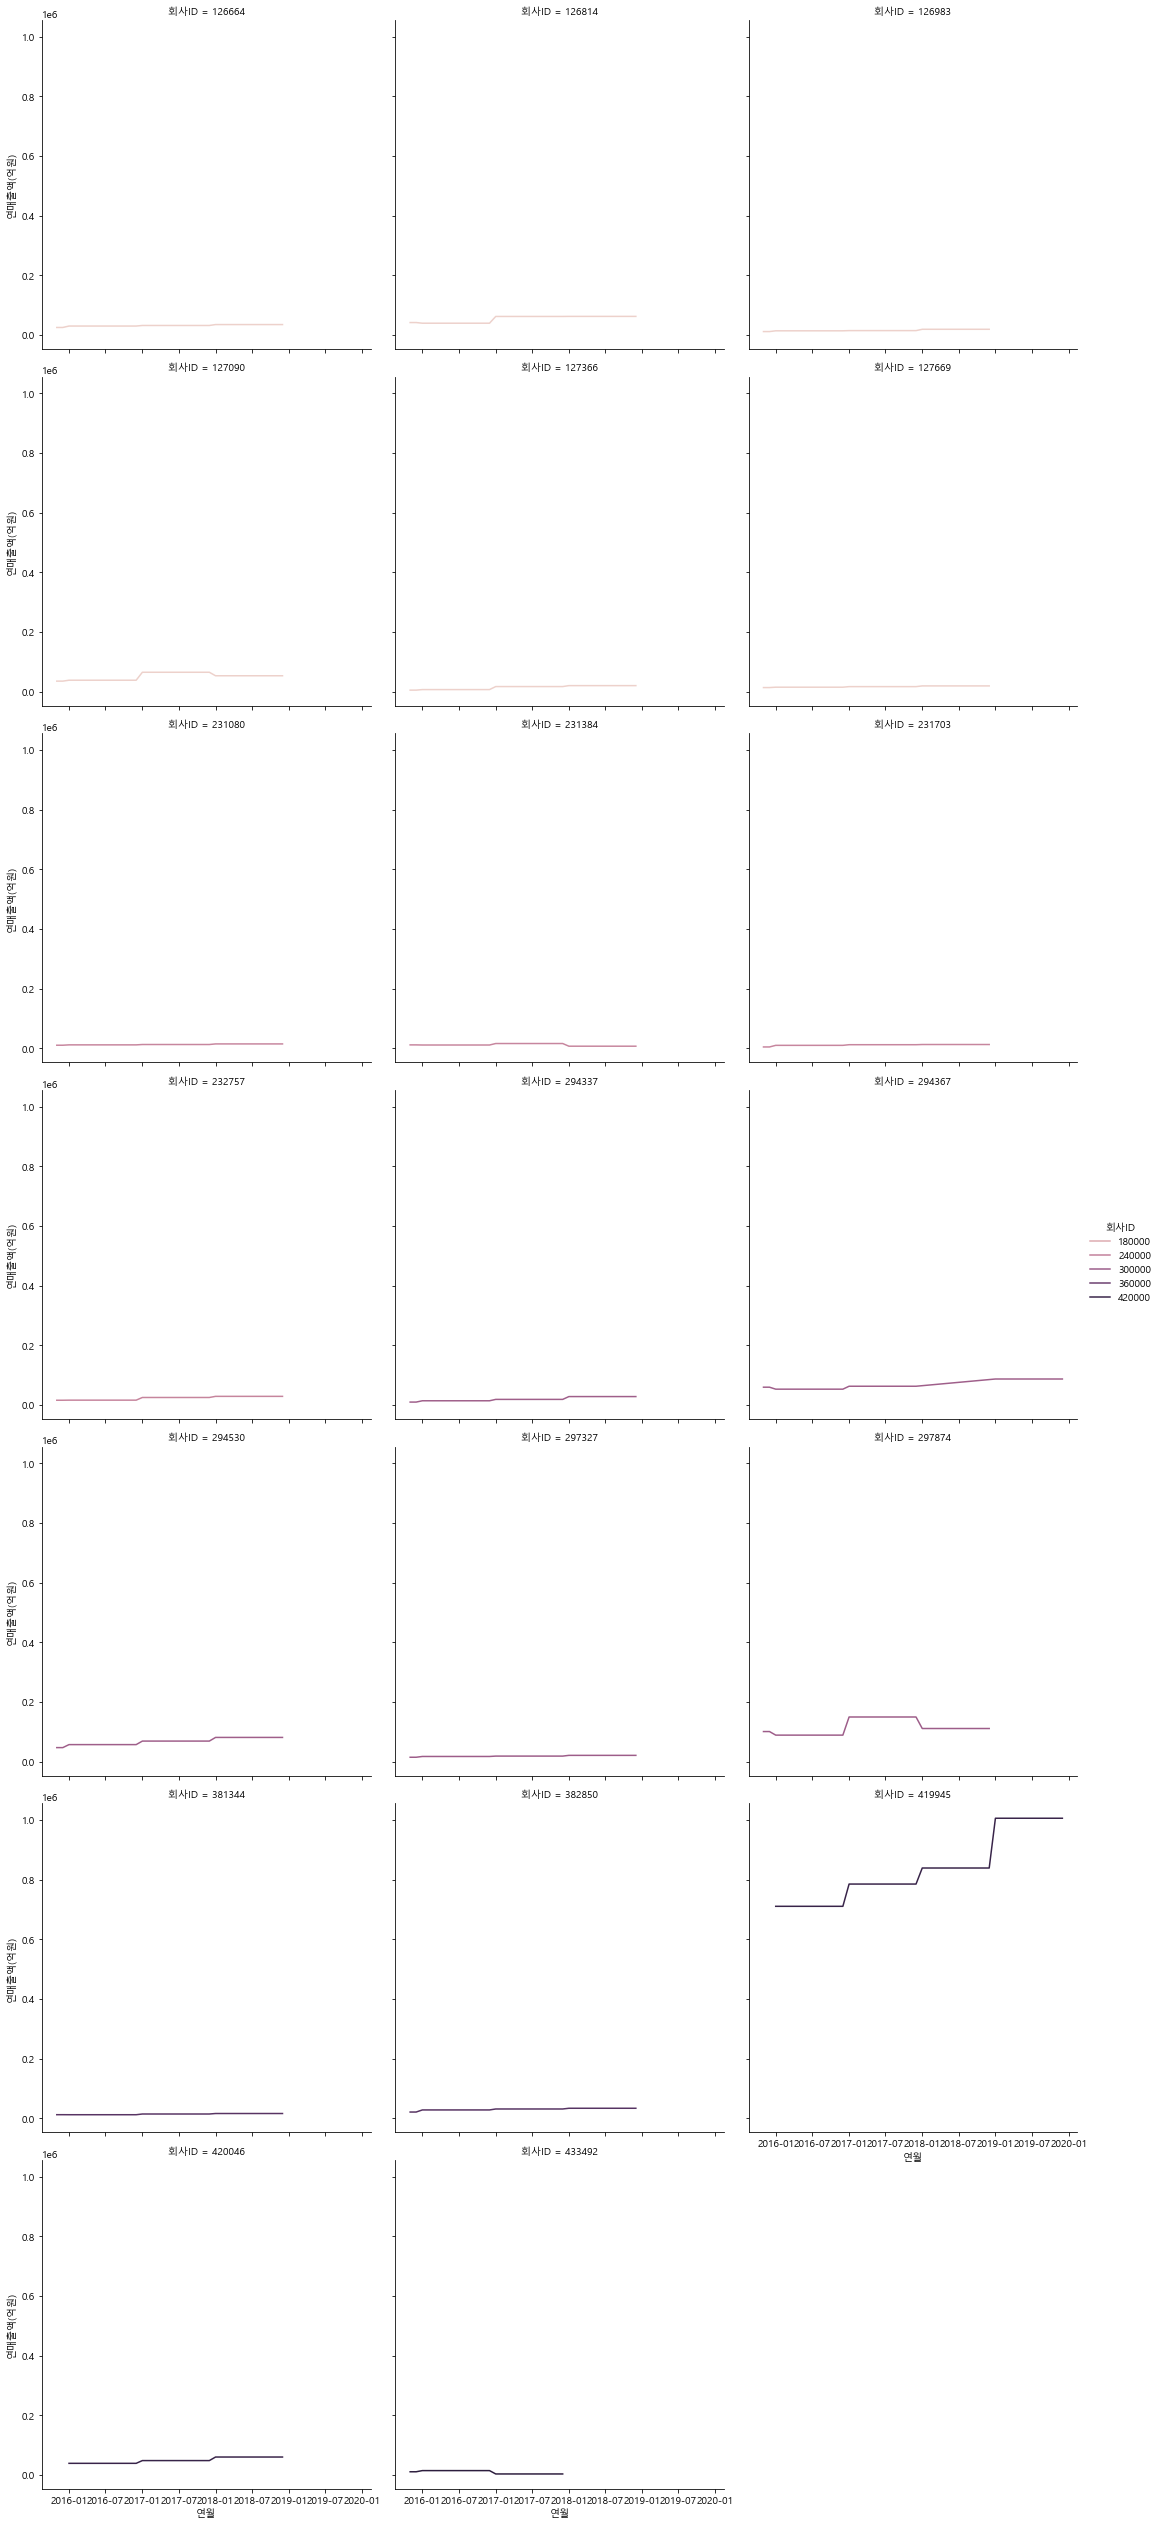

In [54]:
# 연도별 매출액 비교 (top_avg_revenue_list 전체)
sns.relplot(data=df[df['회사ID'].isin(top_avg_revenue_list)], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

In [57]:
tr_list = top_revenue['회사ID'].tolist()
tar_list = top_avg_revenue['회사ID'].tolist()

In [58]:
# 특정 연도의 매출액 성장률 & 자료가 있는 전체 기간의 평균 성장률 모두 높은 기업
inter_list = list(set(tr_list) & set(tar_list))
inter_list

[294530,
 382850,
 127366,
 126983,
 297874,
 231703,
 381344,
 231080,
 232757,
 127669,
 294337,
 126664,
 420046,
 433492,
 231384,
 126814,
 294367,
 419945,
 297327,
 127090]

# 직원수, 연금보험료 성장률
- 위에서 선별한 기업의 직원수, 연금보험료 성장률 확인해보기

In [59]:
df_selected = df[df['회사ID'].isin(inter_list)]
df_selected

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,연매출액(억원)
55,231080,152393780,2018,7,51609300,160,2018-07-01,"15,239"
65,231080,132542490,2017,8,42458520,144,2017-08-01,"13,254"
135,232757,294131018,2018,2,7610780,40,2018-02-01,"29,413"
424,381344,126011882,2016,10,29223440,112,2016-10-01,"12,601"
546,126664,323278620,2017,1,250633620,812,2017-01-01,"32,328"
...,...,...,...,...,...,...,...,...
99299,231703,125968300,2017,1,16994720,53,2017-01-01,"12,597"
99317,126814,627641511,2018,5,148514140,593,2018-05-01,"62,764"
99353,420046,488179570,2017,5,112913540,397,2017-05-01,"48,818"
99579,231384,76051898,2018,11,18138980,51,2018-11-01,"7,605"


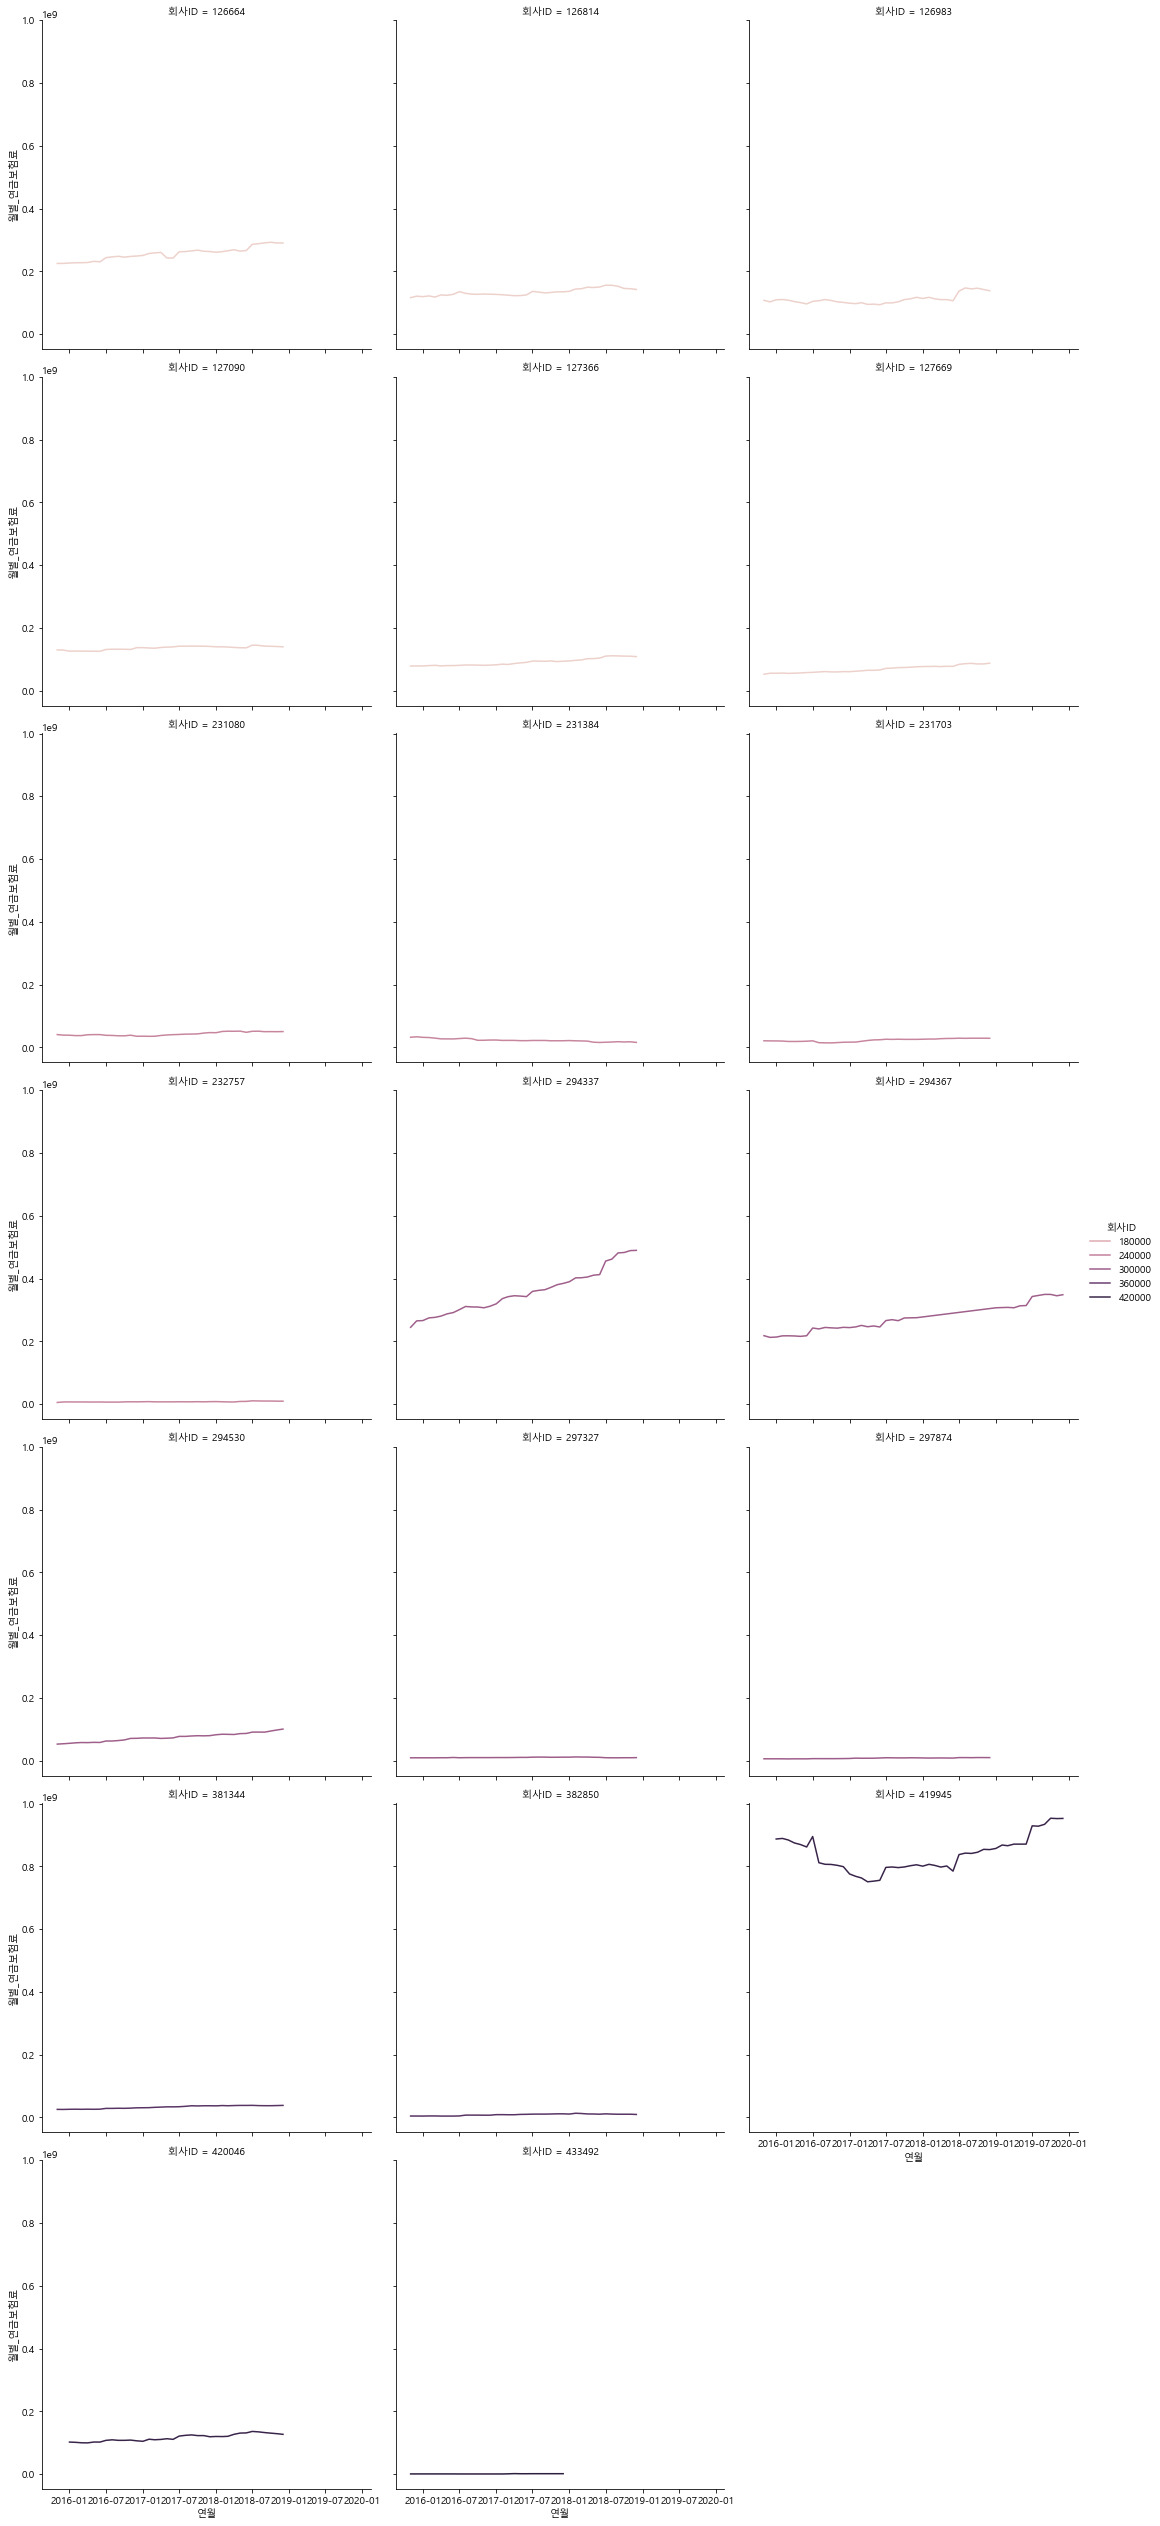

In [60]:
# 월별_연금보험료 
sns.relplot(data=df_selected, x = '연월', y = '월별_연금보험료', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

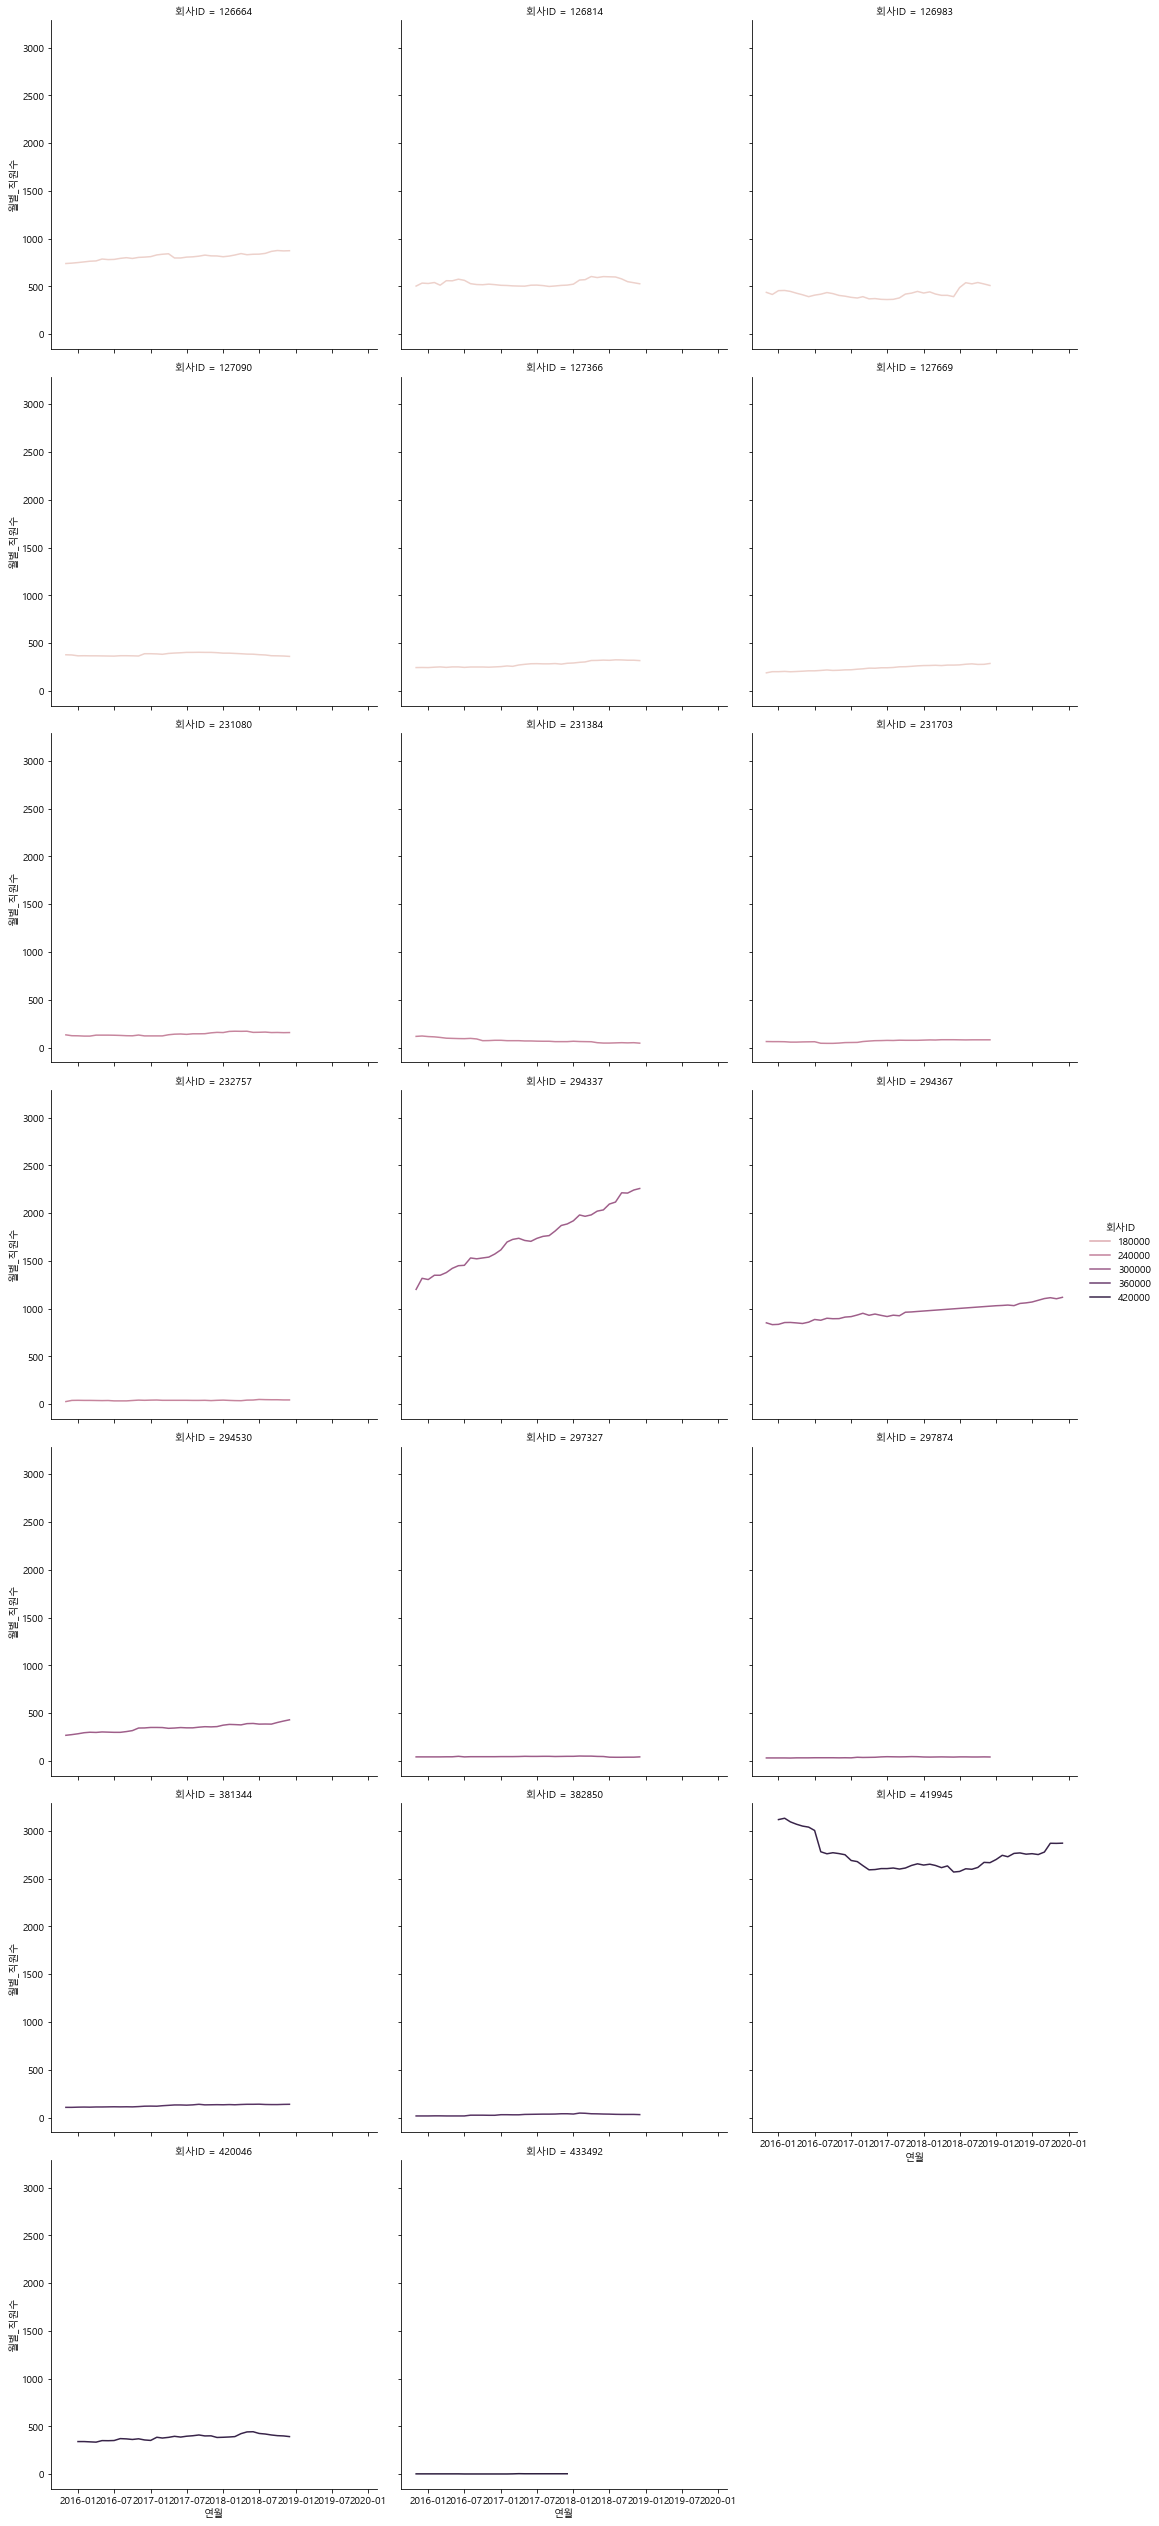

In [61]:
# 월별_직원수 
sns.relplot(data=df_selected, x = '연월', y = '월별_직원수', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

# 최종 기업 확인
- 개별 연도에 대한 연매출액 성장률과 평균 연매출액 성장률이 모두 높은 기업 1차 선별
- 그 중 연금보험료, 직원수가 성장세인 기업 선별

## 유력 후보

In [83]:
final_list = [294337, 294367, 294530]

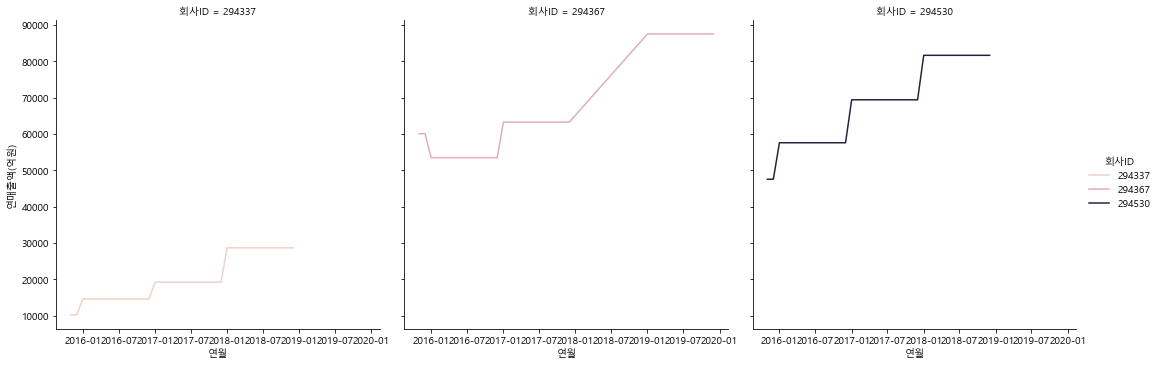

In [87]:
# 연매출액 
sns.relplot(data = df_selected[df_selected['회사ID'].isin(final_list)], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

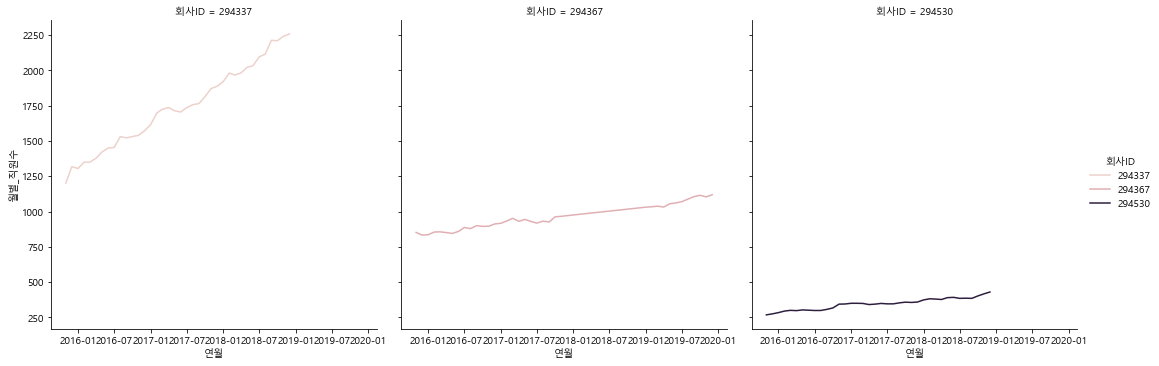

In [92]:
# 월별_직원수 
sns.relplot(data = df_selected[df_selected['회사ID'].isin(final_list)], x = '연월', y = '월별_직원수', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

## 애매한 후보

In [93]:
candidate_list = [419945, 127090, 420046]

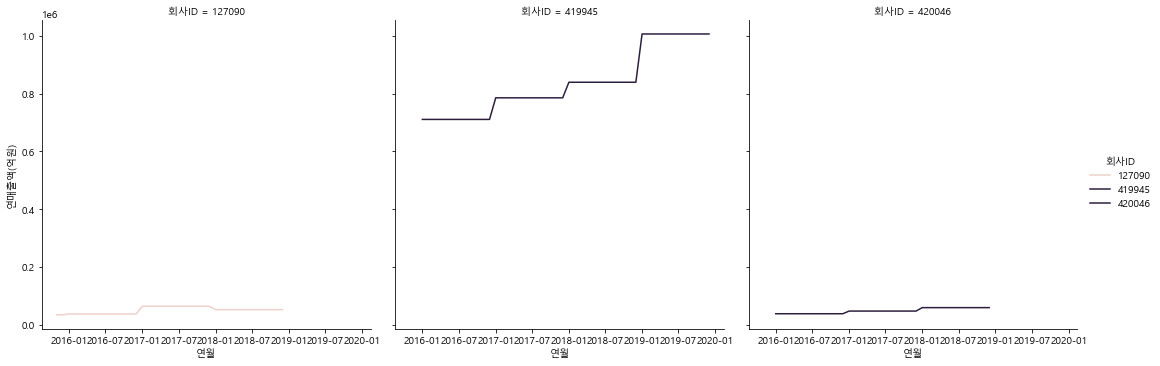

In [94]:
# 연매출액(억원) 
sns.relplot(data = df_selected[df_selected['회사ID'].isin(candidate_list)], x = '연월', y = '연매출액(억원)', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

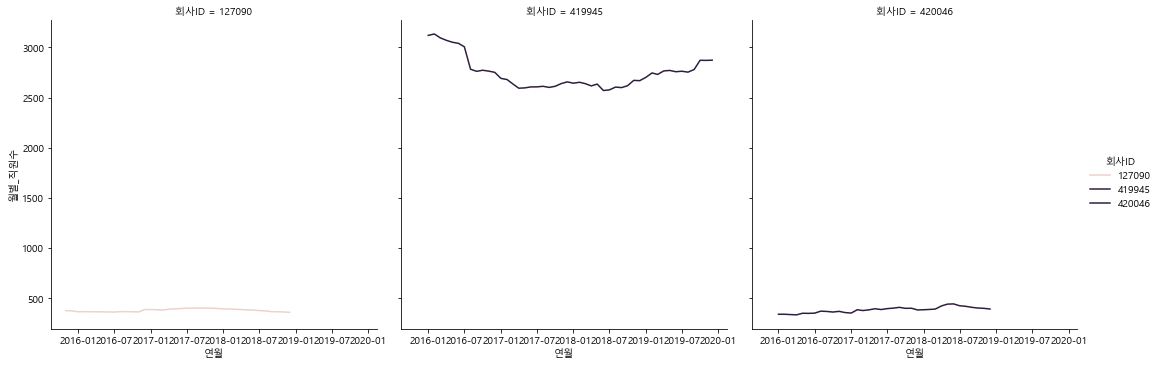

In [91]:
# 월별_직원수
sns.relplot(data = df_selected[df_selected['회사ID'].isin(candidate_list)], x = '연월', y = '월별_직원수', hue = '회사ID',
            kind="line", col="회사ID", col_wrap=3)

- 1인당 매출액 등 추가 기준에 기반한 후보기업 분석 필요